# Whats is statics?

Is the practice and study of collecting Data
we can answer answer questions like:
- How likely is someone to purchase a product? Are people more likely to purchase it if they can use a different payment system?
- How many occupants will your hotel have? How can you optimize occupancy?

in other hand we can't answer questions like:
- Why is Game of Thrones so popular
Because if we ask peapol why they like, they may lie or leave out reasons.
in other hand, we can see if series with more violence content are more attract to viewers, we can't now if this is reason for its popularity


# Types of statistics

## Descriptive Statististics
Describe and summarize the data, in this example we can see the summarize for after asking four frends how the get to work

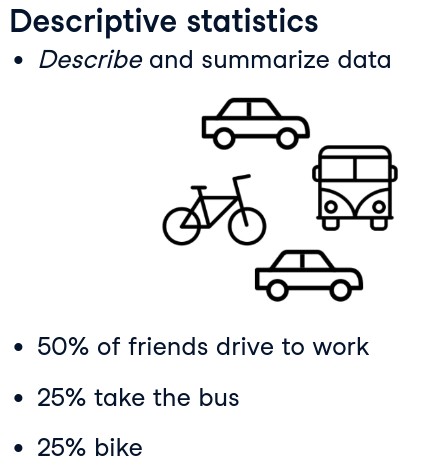

## Inferential Statististics
Use a sample data to make inferences about a large populationS

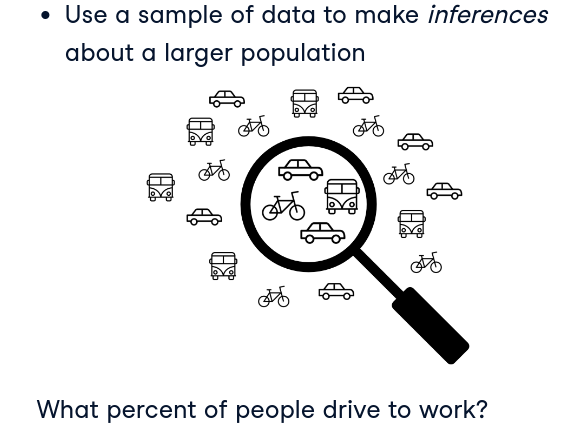


# Types of data

## Numeric (Quantitative)

### Continuous (Measures)
 - Airplain Speed
 - Time spend waiting in line

### Discrete (Counted) 
 - Number of pets
 - Number of packages shipped

## Categorical (Qualitative)

### Nominal(Unordered)

 - Married/unmmarried
 - Country of residence

### Ordinal(Ordered)

 - survey questions where need to indicate the degree to wich you agree with a statement
 


# Measures of center
## Mean
is the avereage, is more sensitive to the extreme values or outliers
## Median
is the value where 50% of the data is lower than it, and 50% of the data is higher.

if the data is skewed, the median is better to use for describe our data

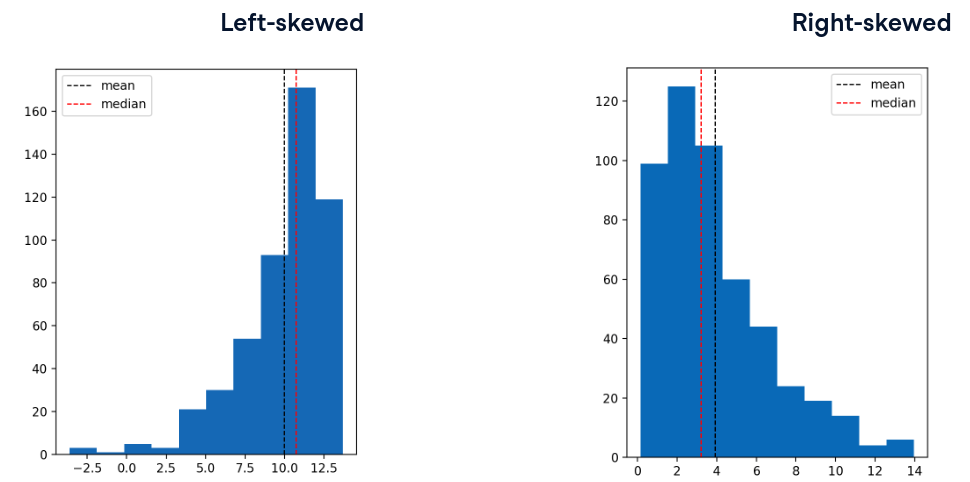


In [27]:
import pandas as pd
# Import numpy with alias np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

food_consumption=pd.read_csv("food_consumption.csv")
# Filter for Belgium
be_consumption = food_consumption[food_consumption["country"]=="Belgium"]

# Filter for USA
usa_consumption = food_consumption[food_consumption["country"]=="USA"]

# Calculate mean and median consumption in Belgium
print(np.mean(be_consumption["consumption"]))
print(np.median(be_consumption["consumption"]))

# Calculate mean and median consumption in USA
print(np.mean(usa_consumption["consumption"]))
print(np.median(usa_consumption["consumption"]))

42.13272727272727
12.59
44.650000000000006
14.58


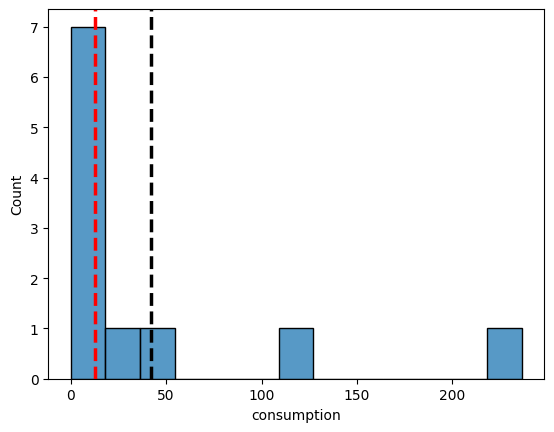

In [22]:
sns.histplot(data=be_consumption,x="consumption")
plt.axvline(np.mean(be_consumption["consumption"]), c='k', ls='--', lw=2.5)
plt.axvline(np.median(be_consumption["consumption"]), c='r', ls='--', lw=2.5)

if we see the median is the best option to describe our kewed data

In [23]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption["country"]=="Belgium") | (food_consumption["country"]=="USA")]

# Group by country, select consumption column, and compute mean and median
print(be_and_usa.groupby("country")["consumption"].agg([np.mean,np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


# Measures of spread

## Variance
is the average distance from each data point to the data's mean

we calculathe this with np.var(data,ddof=1)  if ddof is equial 1 means we calculate the population variance instead of sample variance

## Standard deviation
is the square root of the variance, the unitis of standar deviation are usually easier to understand than variance, penalizing longer distances more than shorter ones

we calculate this wit np.std



In [28]:
# Print variance and sd of co2_emission for each food_category
print(food_consumption.groupby("food_category")["co2_emission"].agg([np.var,np.std]))

                        var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570


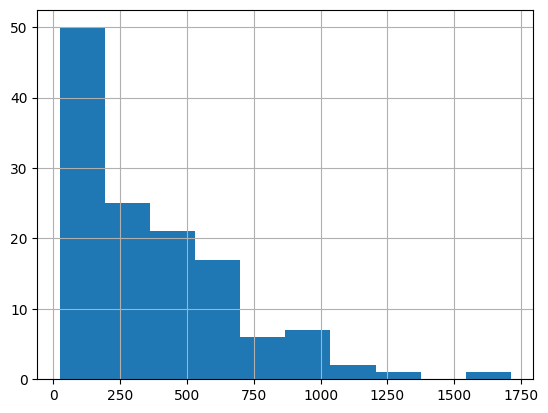

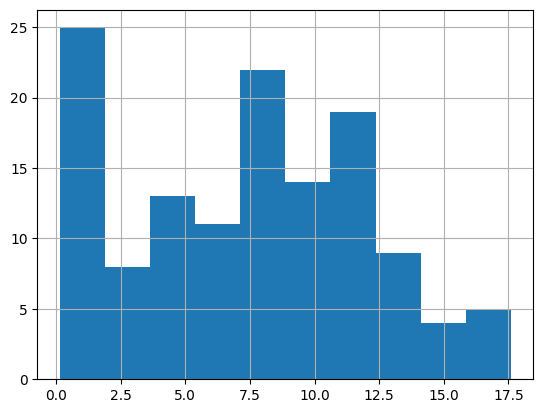

In [29]:
# Create histogram of co2_emission for food_category 'beef'
food_consumption[food_consumption["food_category"]=='beef']["co2_emission"].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption["food_category"]=='eggs']["co2_emission"].hist()
# Show plot
plt.show()

## Mean absolute deviation

take the absolute value of the distances to the mean, and takes the mean of those differences, penalize each distances equaly 

## Quantiles (percentiles)

split the data into some number in equal parts
 - 0.5 quantile = median

Quartile is the definition to split the data in 4 numbers
- we can use boxplots

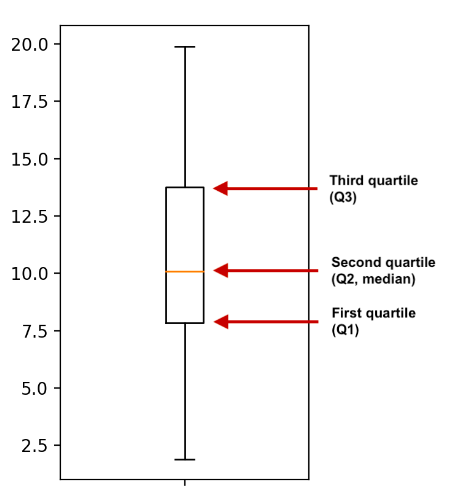


In [25]:
# Calculate the quartiles of co2_emission
print(np.quantile(food_consumption["co2_emission"],q=[0,0.25,0.5,0.75,1]))

[   0.        5.21     16.53     62.5975 1712.    ]


we can use np.linespace to define the quantiles range

np.linespace(start,stop,num)

In [26]:
# Calculate the quintiles of co2_emission
print(np.quantile(food_consumption["co2_emission"],np.linspace(0,1,6)))

# And we can calculate the deciles 

# Calculate the deciles of co2_emission
print(np.quantile(food_consumption["co2_emission"],np.linspace(0,1,11))) 

[   0.       3.54    11.026   25.59    99.978 1712.   ]
[0.00000e+00 6.68000e-01 3.54000e+00 7.04000e+00 1.10260e+01 1.65300e+01
 2.55900e+01 4.42710e+01 9.99780e+01 2.03629e+02 1.71200e+03]


# Interquartile range (IQR)

is tghe distance detween the 25th an 75th percentile, is the distance of the box in the boxplot,

we can calculate this with scipy.stats lybrary with iqr function 

## Outliers
the outlier defines with 

- data < Q1 - 1.5 * IQR or 
  data > Q3 + 1.5 *IQR

664.4925000000001
664.4925000000001
country
Argentina    2172.4
Name: co2_emission, dtype: float64


<AxesSubplot:>

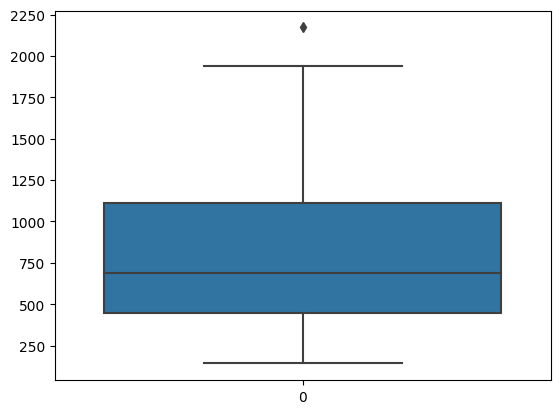

In [40]:
from scipy.stats import iqr 
import seaborn as sns
# Calculate total co2_emission per country: emissions_by_country
emissions_by_country = food_consumption.groupby('country')['co2_emission'].sum()

# Compute the first and third quantiles and IQR of emissions_by_country
q1 = np.quantile(emissions_by_country, 0.25)
q3 = np.quantile(emissions_by_country, 0.75)
iqr_ = q3 - q1
print(iqr_)
iqr_ = iqr(emissions_by_country)
print(iqr_)

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr_
upper = q3 + 1.5 * iqr_

# Subset emissions_by_country to find outliers
outliers = emissions_by_country[(emissions_by_country<lower) | (emissions_by_country>upper)]
print(outliers)

sns.boxplot(emissions_by_country)

# Use Describe()

the resume the data statics

In [41]:
emissions_by_country.describe()

count     130.000000
mean      818.223923
std       456.011755
min       141.400000
25%       446.660000
50%       685.900000
75%      1111.152500
max      2172.400000
Name: co2_emission, dtype: float64

# Random Numbers and Probability


## Measuring chance
we can calculate the chance with prbability

$$
  P(event) = \frac{number-ways-event-can-happen}{total-number-of-possible-outcome}
$$

$$
  P(heads) = \frac{1-ways-to-get-heads}{2-possible outcome} =\frac{1}{2} = 50%
$$

we can use sample() metod in python to choose one result randomly inthes methos we can include replace statement in true to select repeated data in our sample (Independent event), set false to obtain the outcome with diffent data values without repeat(Dependendet event)

we can use random.seed() to define the initial point to random result 

In [43]:
amir_deals=pd.read_csv("amir_deals.csv")
# Count the deals for each product
counts = amir_deals['product'].value_counts()

# Calculate probability of picking a deal with each product
probs = counts/sum(counts)
print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


In [44]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5,replace=False)
print(sample_without_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11


In [45]:
# Set random seed
np.random.seed(24)

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5,replace=True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
162         163  Product D  Current    Won  6755.66         59
131         132  Product B  Current    Won  6872.29         25
87           88  Product C  Current    Won  3579.63          3
145         146  Product A  Current    Won  4682.94         63
145         146  Product A  Current    Won  4682.94         63


## Independent events
Two events are independents id the probability of the second event is not afected by the aoutcome of the first

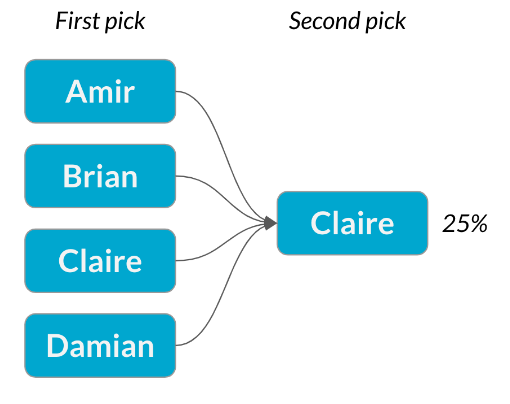

## Dependent events
Two events are independents id the probability of the second event is afected by the aoutcome of the first

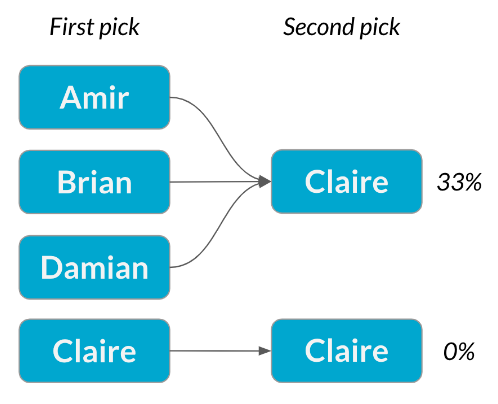

# Distributions

## Discrete distribution
Describe the probability each possible outcome scenario, the principal characteristic is if we have discrete variables (counted)

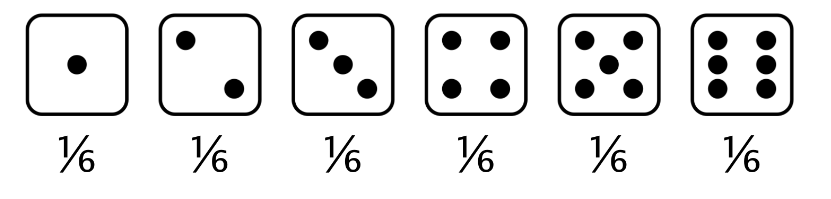

Expected value is the mean of a probability distribution

Expected- value of a fair die roll:
$$
(1 * \frac{1}{6})+(2 * \frac{1}{6})+(3 * \frac{1}{6})+(4 * \frac{1}{6})+(5 * \frac{1}{6})+(6 * \frac{1}{6})=3.5
$$

to calculate area distrution example 

the probability to obtain 4 or more is
$$
(\frac{1}{6})+(\frac{1}{6})+(\frac{1}{6})=1/2
$$


   users      prob
0     17  0.039326
1      2  0.039326
2     12  0.033708
3     23  0.028090
4      3  0.028090

The Expected value is : 37.65168539325843
The probability to obtain 30 or more users is : 0.5280898876404495


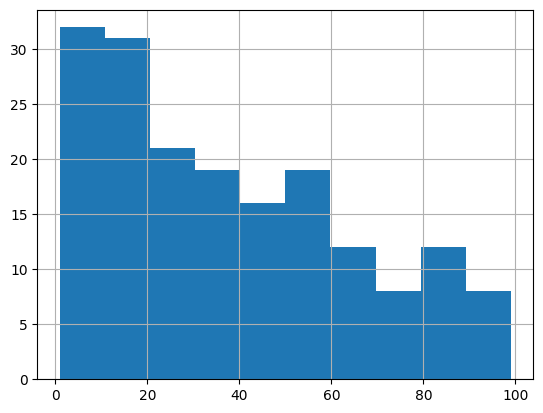

In [65]:
size_dist = amir_deals["num_users"].value_counts()/len(amir_deals)

size_dist=size_dist.reset_index()
size_dist.columns = ['users', 'prob']

expected_value = np.sum(size_dist['users']*size_dist['prob'])
print(size_dist.head())
print()
print("The Expected value is : "+ str(expected_value))
amir_deals["num_users"].hist()


# Subset users of size 30 or more
users_30_or_more =  size_dist[size_dist['users']>=30]

# Sum the probabilities of users_30_or_more
prob_30_or_more  = np.sum(users_30_or_more ['prob'])
print("The probability to obtain 30 or more users is : "+ str(prob_30_or_more))

### Law of large numbers
if we have a largest sample, the expected value or mean is more similar at theory value

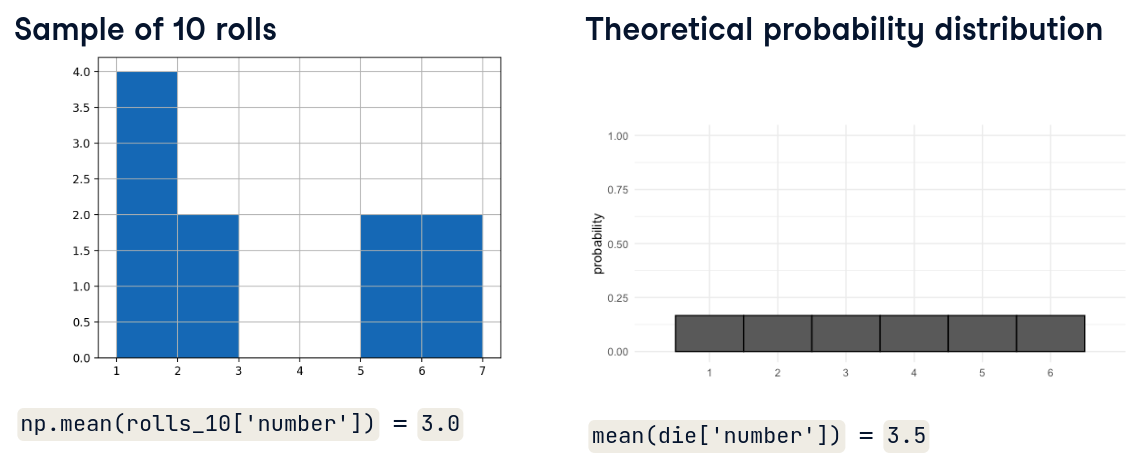

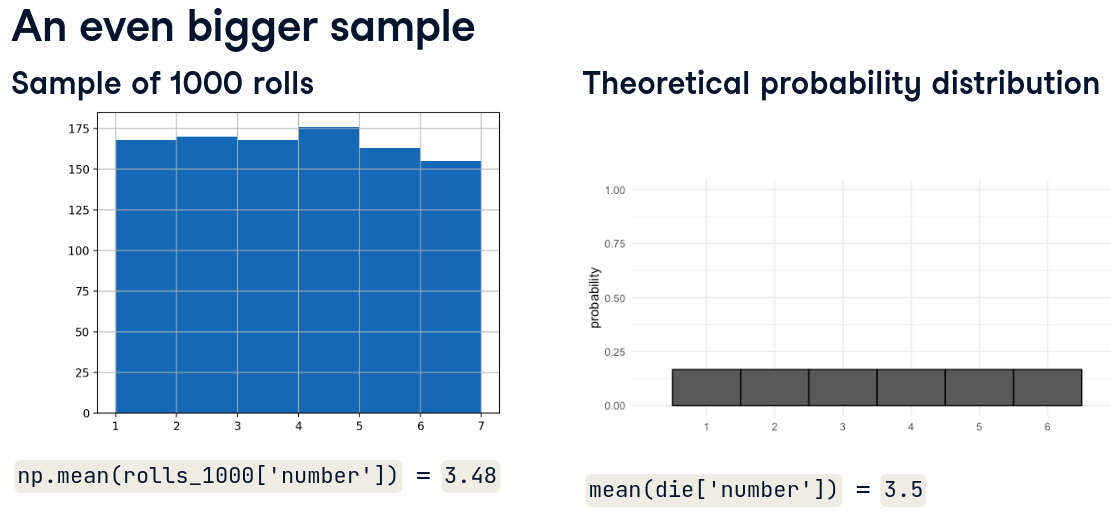

## Continuous distribution

we have a continiuosu distributions if we have continuous vaiables like time

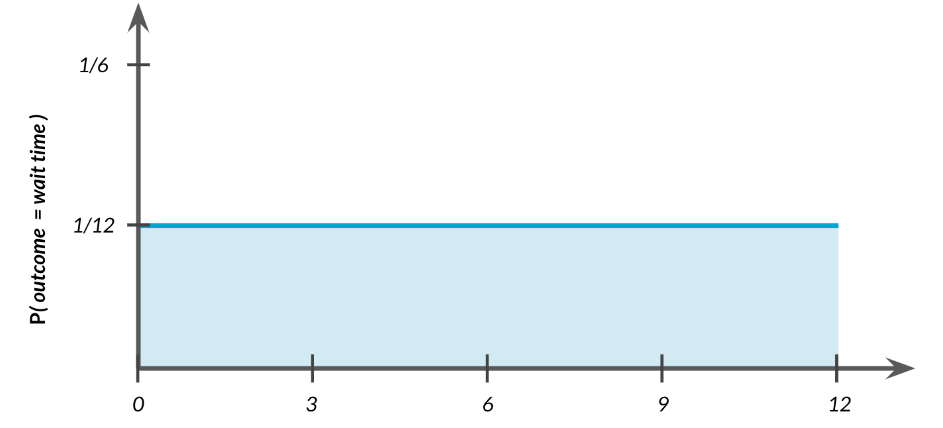

this is the probability distribution to take a bus along 0 minutes to 12 minutes

to caculate the probabily area:

$$
P(4<= wait-time <=)=3* \frac{1}{12}=3/12
$$

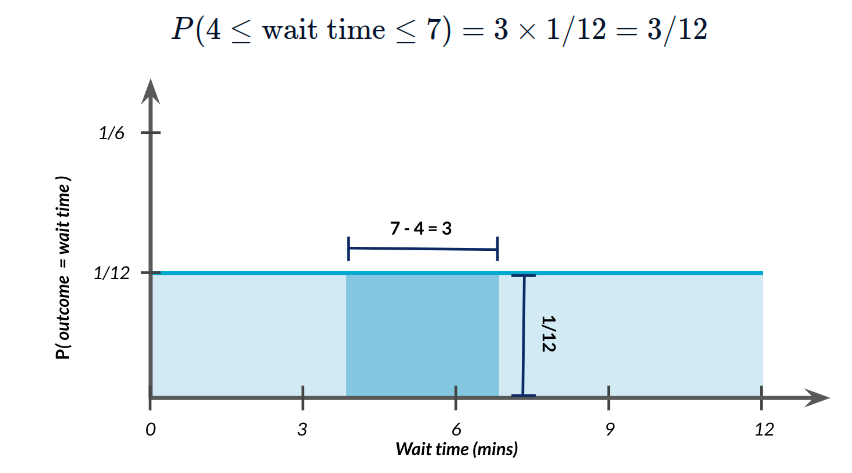


to calculate in python the probability in uniform distribution we use scipy.stats

Example, if we want calculate the probability:

$$
P(wait-time<=7)
$$

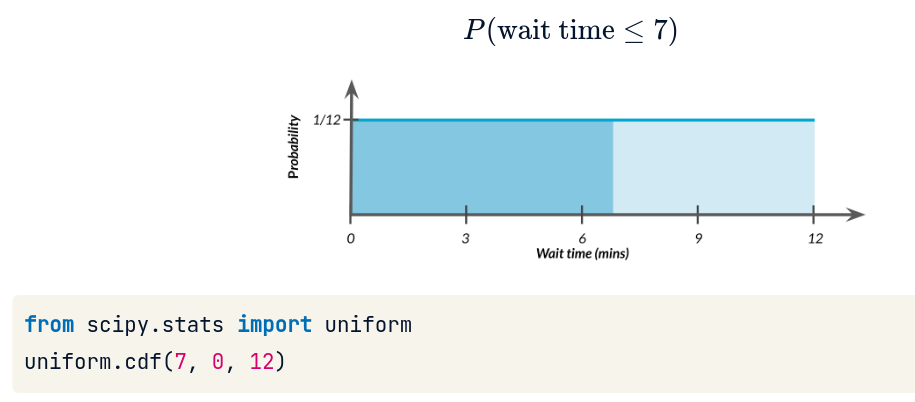

In [69]:
# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

# Import uniform from scipy.stats
from scipy.stats import uniform

# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5,min_time,max_time)
print("probability of waiting less than 5 mins: "+str(prob_less_than_5))

# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = uniform.cdf(30,min_time,max_time)-uniform.cdf(5,min_time,max_time)
print("probability of waiting more than 5 mins: "+ str(prob_greater_than_5))


# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20,min_time,max_time)-uniform.cdf(10,min_time,max_time)
print("probability of waiting 10-20 mins: "+str(prob_between_10_and_20))


probability of waiting less than 5 mins: 0.16666666666666666
probability of waiting more than 5 mins: 0.8333333333333334
probability of waiting 10-20 mins: 0.3333333333333333


### Generating random numbers (Uniform Continuous distribution)

we can use the library scipy with rvs method

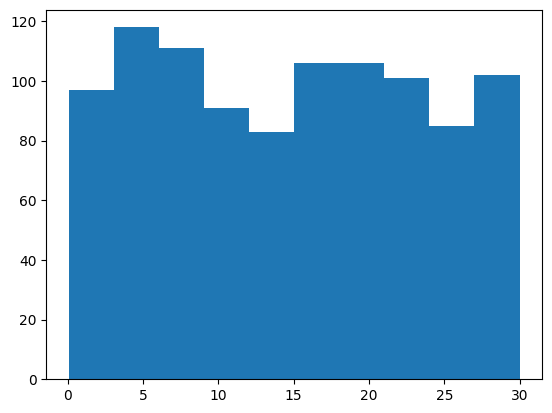

In [70]:
# Set random seed to 334
np.random.seed(334)

# Import uniform
from scipy.stats import uniform

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

## Binomial distribution

Describe the probability distribution of the number of success in a sequence of  **independent** trials

is the distribution that have two posibles outcomes like flip a coin:

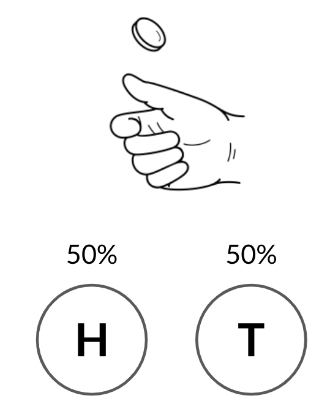       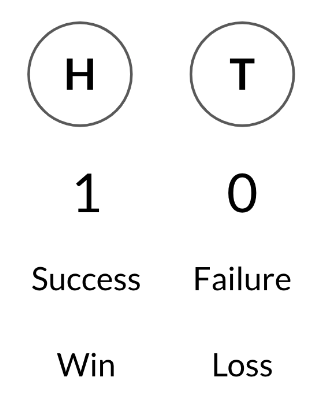



### Generating random numbers (Uniform binomial distribution)

we can use the library scipy with rvs(# of coins, probability of heads/success, size=# of trials) method

In [87]:
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

coin_outcome=binom.rvs(7,0.5,size=10)

# Print mean deals won per week
print(np.mean(coin_outcome))


2.8


### Work with probability distribution
$$
P(heads=7)
$$

we can use pmf(num heads,num trials,prob of heads)

binom.pmf(7,10,0.5)

$$
P(heads<=7)
$$
we can use cdf(num heads,num trials,prob of heads)


binom.cdf(7,10,0.5)

In [90]:
# Probability of obtain 7 in 10 trials
prob_7 = binom.pmf(7,10,0.5)

print(prob_7)

# Probability obtain <= 1 in 10 trials
prob_less_than_or_equal_1 = binom.cdf(1,10,0.5)

print(prob_less_than_or_equal_1)

# Probability of obtain > 1  10 deals
prob_greater_than_1 = 1- binom.cdf(1,10,0.5)

print(prob_greater_than_1)

0.11718749999999999
0.0107421875
0.9892578125


### Espected value

$$
Expected value = num trials * prob of heads
$$

In [95]:
# Expected number of heads with 30% win rate in 10 flips
won_50pct = 10 * 0.5
print(won_50pct)

# Expected number of heads with 25% win rate in 10 flips
won_25pct = 7 * 0.25
print(won_25pct)

# Expected number of heads with 35% win rate in 10 flips
won_35pct = 7 * 0.35
print(won_35pct)

5.0
1.75
2.4499999999999997


## Normal Distribution